In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

/data/data/com.termux/files/usr/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:28: UserWarning: This platform lacks a functioning sem_open implementation, therefore, the required synchronization primitives needed will not function, see issue 3770..  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
data = make_blobs(n_samples = 200, n_features = 2, centers = 4, cluster_std = 1.6, random_state = 50)

In [3]:
points = data[0]

(-10.110265626047585,
 5.932741640061414,
 -12.798787852785619,
 14.719437557000862)

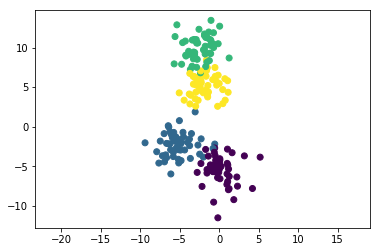

In [4]:
plt.scatter(data[0][:,0], 
            data[0][:,1],
            c=data[1],
            cmap='viridis')
plt.axis('equal')

In [5]:
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(n_clusters=4).fit(points)

In [7]:
c_x = kmeans.cluster_centers_[:,0]
c_y = kmeans.cluster_centers_[:,1]

(-10.110265626047585,
 5.932741640061414,
 -12.798787852785619,
 14.719437557000862)

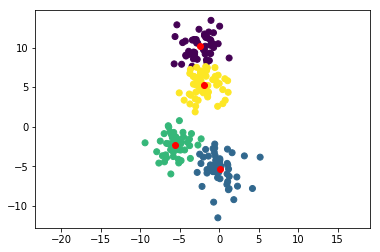

In [8]:
# plot data and centroid
plt.figure
plt.scatter(points[:,0], 
            points[:,1],
            c=kmeans.labels_,
            cmap='viridis')
# plot centroid
plt.scatter(c_x, c_y, c='red')
plt.axis('equal')

In [9]:
from sklearn import metrics

In [10]:
metrics.silhouette_score(points,
                         kmeans.labels_)

0.5280677534400235

In [21]:
def find_n_clust(X, n):
    scores = []
    for i in range(2, n+1):
        kmeans = KMeans(n_clusters=i).fit(X)
        score = metrics.silhouette_score(X, 
                                         kmeans.labels_)
        scores.append(score)
    return(scores)

In [34]:
n = 20
s = find_n_clust(points, n)

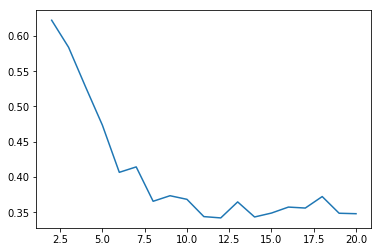

In [36]:
x = np.arange(2, n+1)
plt.plot(x, s)

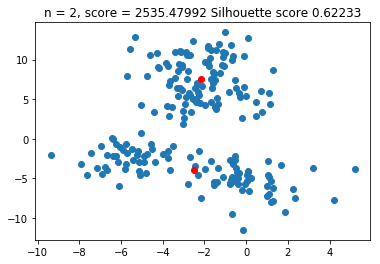

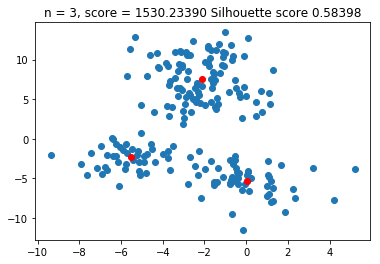

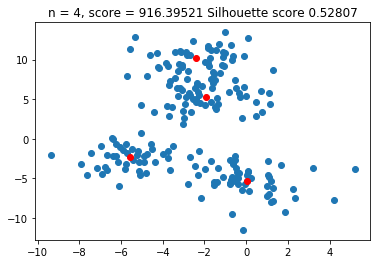

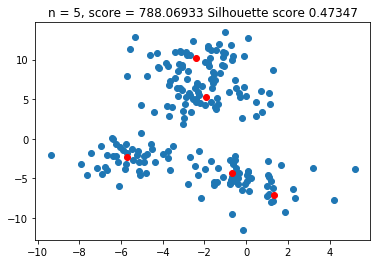

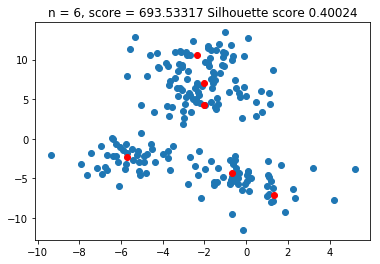

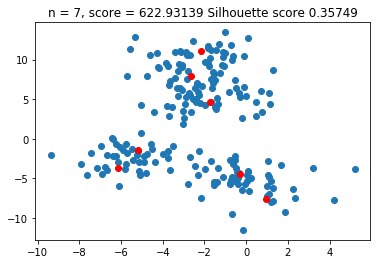

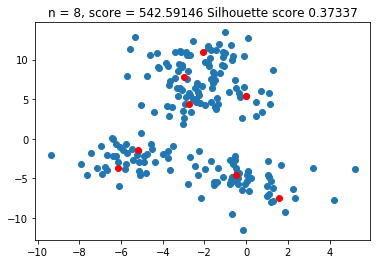

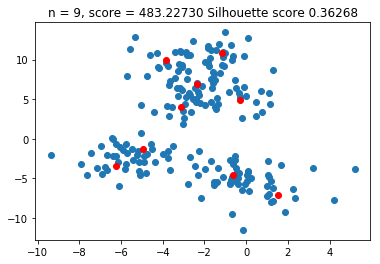

In [70]:
iners = []
scrs = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i).fit(points)
    iner = kmeans.inertia_
    iners.append(iner)
    s = metrics.silhouette_score(points, kmeans.labels_)
    scrs.append(s)
    plt.figure()
    plt.scatter(x = points[:,0], y = points[:,1])
    c_x = kmeans.cluster_centers_[:,0]
    c_y = kmeans.cluster_centers_[:,1]
    plt.scatter(c_x, c_y, c='red')
    plt.title('n = {:d}, score = {:.5f} Silhouette score {:.5f}'.format(i, iner, s))

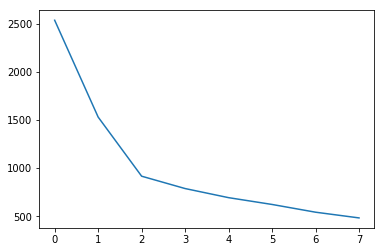

In [71]:
plt.plot(iners)

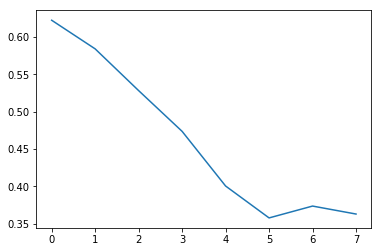

In [72]:
plt.plot(scrs)